In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


The First Step is Loading the Dataset

In [2]:
df = pd. read_csv('StudentPerformanceData.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


The Next Step is Data Pre-Processing 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Dropping Columns in the Data

In [6]:
drop_columns = ['Dalc','Walc','reason','famsup','address','paid']

In [7]:
df.drop(columns=drop_columns, inplace = True)

In [8]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


With the above command, we can quickly determine these points:

- The students are of the age 15 to 22
- The average age of 395 students is 16-17
- The average educational rank of the Mother and Father is 1.09, which indicates that they are not well-educated.
- A student study for 2 hr in a day on an average 
- The average for all three grades is the same 10

Since the three grades averages are equal, let's take the average grade as an another feature that will be the mean of the three grades

In [9]:
df["G-avg"] = (df.G1+df.G2+df.G3)/3

In [10]:
df["G-avg"].head()

0     5.666667
1     5.333333
2     8.333333
3    14.666667
4     8.666667
Name: G-avg, dtype: float64

If we compare the three grades of the first five student, the average grade fits perfectly to them, as the value is closer to all three

Let's examine the specific factors that influence a student's grade.

Text(0.5, 1.0, 'number of students attending various schools')

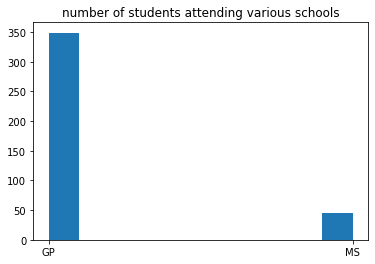

In [11]:
plt.hist(df.school)
plt.title("number of students attending various schools")

This indicates that there are just two schools where student performance is documented. There are much fewer kids attending MS schools than GP schools.

Text(0.5, 1.0, 'students study time')

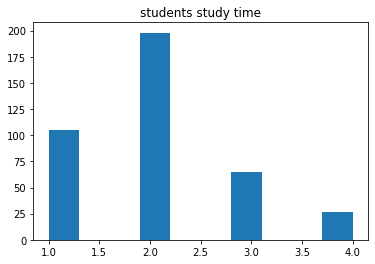

In [12]:
plt.hist(df.studytime)
plt.title('students study time')

Most students study for about 2 hours, a few for 1 hour, a few for 3 hours, and very few for 4 hours

Text(0.5, 1.0, 'Number of failures among students')

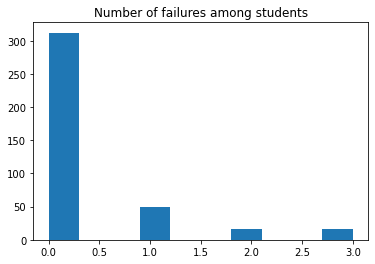

In [13]:
plt.hist(df.failures)
plt.title("Number of failures among students")

Very few students failed, the most times any student failed is 3

{'whiskers': [<matplotlib.lines.Line2D at 0x1957d09a6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1957d09ad60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1957d09a340>],
 'medians': [<matplotlib.lines.Line2D at 0x1957d0a5460>],
 'fliers': [<matplotlib.lines.Line2D at 0x1957d0a57c0>],
 'means': []}

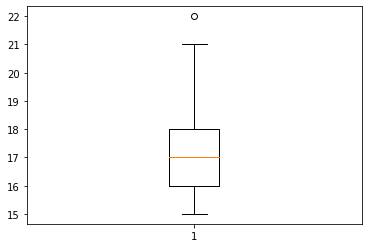

In [14]:
plt.boxplot(df['age'])

The Boxplot shows that the majority of pupils are between the ages of 16 to 18, with only a few outliers that are 22. There may be a variety of reasons for this outlier

Let's look at the number of failures this student has experienced

In [15]:
df[['age','studytime','traveltime','failures','absences','G-avg']].loc[df.age ==22]

,age,studytime,traveltime,failures,absences,G-avg
247,22,1,1,3,16,7.333333


The student in question has the greatest failure rate in the dataset and the study period is one hour, 
which makes them an exceptional example in terms of age.

- This leads us to believe that perhaps this student is not the best in his or her schoolwork

Let's examine students who have failed 3 times

In [16]:
df.loc[df.failures==3]

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,romantic,famrel,freetime,goout,health,absences,G1,G2,G3,G-avg
2,GP,F,15,LE3,T,1,1,at_home,other,mother,...,no,4,3,2,3,10,7,8,10,8.333333
18,GP,M,17,GT3,T,3,2,services,services,mother,...,no,5,5,5,5,16,6,5,5,5.333333
78,GP,M,17,GT3,T,2,1,other,other,mother,...,no,4,5,1,3,2,8,8,10,8.666667
127,GP,F,19,GT3,T,0,1,at_home,other,other,...,no,3,4,2,5,2,7,8,9,8.000000
144,GP,M,17,GT3,T,2,1,other,other,mother,...,no,5,4,5,5,0,5,0,0,1.666667
146,GP,F,15,GT3,T,3,2,health,services,father,...,no,3,3,2,3,0,6,7,0,4.333333
149,GP,M,15,LE3,A,2,1,services,other,mother,...,no,4,5,5,5,0,8,9,10,9.000000
150,GP,M,18,LE3,T,1,1,other,other,mother,...,yes,2,3,5,4,0,6,5,0,3.666667
153,GP,M,19,GT3,T,3,2,services,at_home,mother,...,yes,4,5,4,4,0,5,0,0,1.666667
157,GP,F,18,GT3,T,1,1,at_home,other,mother,...,no,5,2,5,4,6,9,8,10,9.000000


The failure and age are clearly unrelated in the above code, as seen by the instances where students as young as 15, 16, 17  yet had 3 failures.

(array([208.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 187.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

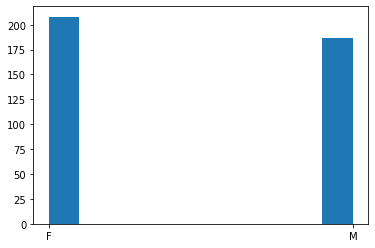

In [17]:
plt.hist(df.sex)

The number of male and female students does not significantly differ, however as can be seen from the above plot, the female student count (210) is slightly greater than the male student count (185)

(array([257.,   0.,   0., 107.,   0.,   0.,  23.,   0.,   0.,   8.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

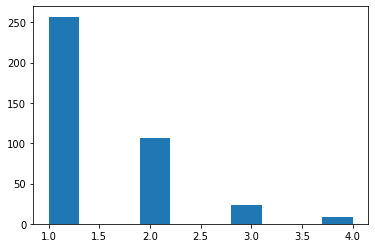

In [18]:
plt.hist(df.traveltime)

Only a very small number of pupils have longer travel times than the average of 4 hours a day. Most pupils only get it for 1 hour.

{'whiskers': [<matplotlib.lines.Line2D at 0x1957d1e0e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1957d1f0520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1957d1e0ac0>,
 'medians': [<matplotlib.lines.Line2D at 0x1957d1f0be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1957d1f0f40>,
 'means': []}

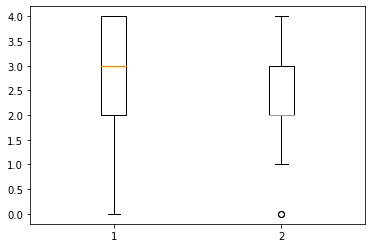

In [19]:
plt.boxplot(df[['Medu','Fedu']])

There is only one father who is uneducated among the parents, and the most of them appear to be well educated (based on their high rates on a scale of 1 to 4, it appears that most of them have graduated). On a scale of 1 to 4, mothers receive higher scores than fathers since they are more educated.

In [20]:
print("Number of students involved in  any sort of activities:")
print(df.activities.value_counts())
print('Number of students been to nursery or not')
print(df.nursery.value_counts())
print("Number of student that uses internet")
print(df.internet.value_counts())

Number of students involved in  any sort of activities:
yes    201
no     194
Name: activities, dtype: int64
Number of students been to nursery or not
yes    314
no      81
Name: nursery, dtype: int64
Number of student that uses internet
yes    329
no      66
Name: internet, dtype: int64


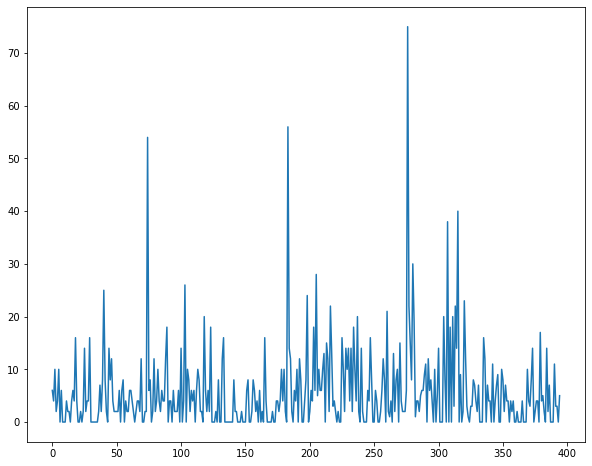

In [21]:
plt.figure(figsize=(10,8))
plt.plot(df.absences)

According to the line plot above, the majority of students have absences that are less than 15. There are some instances where this number is higher, but for the most part, it is less than 15. 75 was the highest number.

Text(0.5, 1.0, 'number of hours that each students go outside')

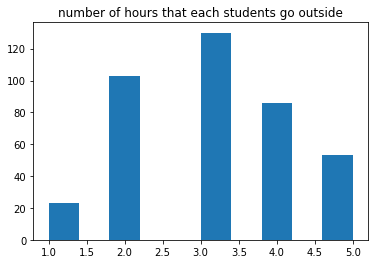

In [22]:
plt.hist(df.goout);
plt.title("number of hours that each students go outside")

Few pupils go outside for just one hour; most spend a maximum of three hours outside 
(perhaps for several physical activities)

Text(0.5, 1.0, 'students health on a scale of 1 to 5')

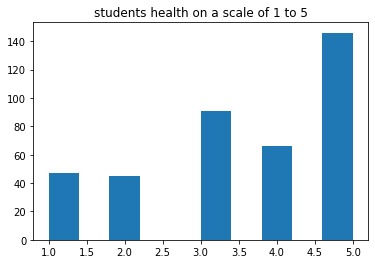

In [23]:
plt.hist(df.health);
plt.title("students health on a scale of 1 to 5")

Text(0.5, 1.0, 'Number of students free hours')

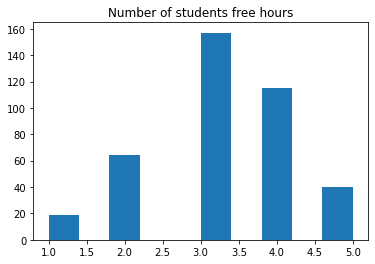

In [24]:
plt.hist(df.freetime)
plt.title('Number of students free hours')

The above plot shows us the Maximum number students hava free time is 3 hrs

Text(0.5, 1.0, 'students guardian')

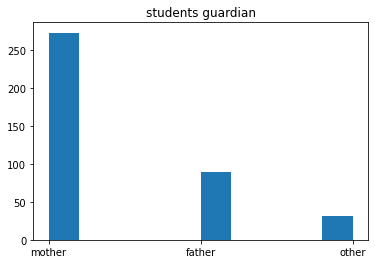

In [25]:
plt.hist(df.guardian)
plt.title('students guardian')

According to the histogram, most pupils guardians are their mothers, while very few have different guardians.

In [26]:
a=[]
for values in df.Mjob.value_counts():
    a.append(values)

In [27]:
label = ['other','services','at_home','teacher','health']

Text(0.5, 1.0, 'mothers various occupation')

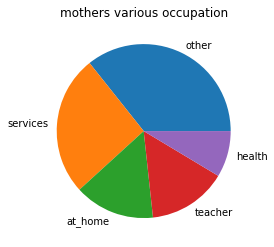

In [28]:
plt.pie(a,labels =label)
plt.title('mothers various occupation')

Let's see whether there is a correlation between better grades and having a teacher for a mother

In [29]:
df['G-avg'].loc[df.Mjob=='teacher']

10      9.000000
13     10.333333
20     14.000000
22     15.333333
29     11.000000
32     16.333333
36     16.333333
41     12.000000
48     14.666667
57     14.666667
63      9.333333
65     15.333333
75      9.333333
76     10.666667
89      7.000000
93     10.333333
110    18.666667
113    18.666667
115    15.333333
129    18.000000
139    15.666667
140     5.333333
142    10.333333
148     4.333333
172    11.333333
175     9.333333
178     9.000000
180     8.333333
197     9.333333
199     9.333333
207    12.000000
209     7.000000
224    13.333333
232     9.666667
241    11.000000
242     2.000000
256    13.000000
261     8.000000
267    11.000000
277     9.000000
279    10.333333
281    10.000000
289    14.333333
290    11.333333
299    15.666667
307     8.333333
319    11.000000
328     9.333333
329    14.000000
341     6.666667
346    15.666667
347     9.666667
356    12.666667
366    13.000000
377     9.000000
380    14.333333
386     5.666667
388     8.000000
Name: G-avg, d

Given that the range starts at a minimum grade of 5, and goes up to a maximum grade of 18, 
it demonstrates that the mother's occupation has little impact on the student's grades.

In [30]:
b=[]
for job in df.Fjob.value_counts():
    b.append(job)

Text(0.5, 1.0, 'fathers various occupation')

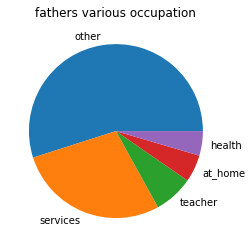

In [31]:
plt.pie(b, labels=['other','services','teacher','at_home','health'])
plt.title("fathers various occupation")

In [32]:
df['G-avg'].loc[df.Fjob=='teacher']

0       5.666667
7       5.666667
29     11.000000
37     15.333333
42     18.333333
49      7.000000
60     10.666667
101    16.666667
110    18.666667
115    15.333333
116    12.666667
129    18.000000
130     4.000000
134     3.000000
139    15.666667
148     4.333333
154    11.333333
196    16.000000
198    18.000000
199     9.333333
222    16.333333
232     9.666667
287    12.333333
289    14.333333
299    15.666667
301    10.666667
329    14.000000
369    12.333333
380    14.333333
Name: G-avg, dtype: float64

Similar to mothers occupation, fathers occupation has little bearing on students' grades.